# Did Fandango make a change after the suggestion they published inflated ratings...?

*(Spoiler alert: yes, it looks like they did!)*

[Fandango](https://www.fandango.com/) is a movie ticketing company. On their website you can read about new movies, and buy tickets. To help you make decisions, online movie ratings are published as well.

In 2015, data journalist Walt Hickey analyzed movie ratings (for multiple websites) and found strong evidence that the ratings published by Fandango were dishonest as they were consistently rounded up. He published his foundings in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/). The screenshot below, taken from his article, shows how Fandango ratings were significantly higher than ratings on other websites.



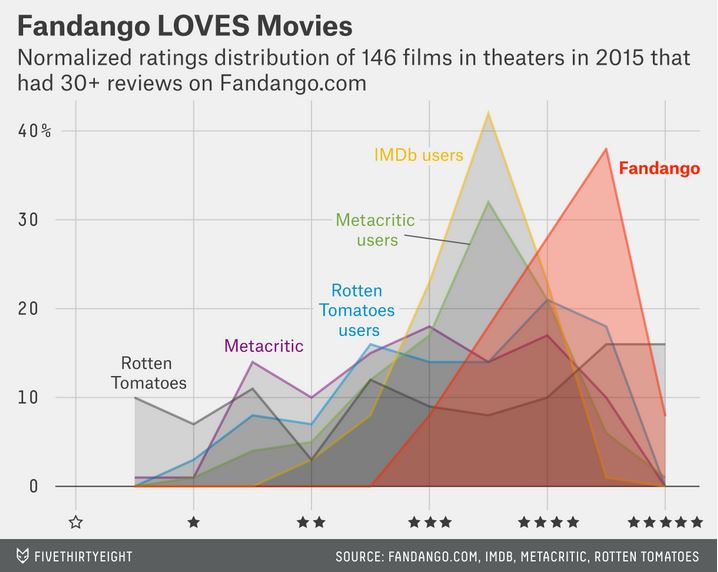

By checking the HTML of the pages, Hickey then found that these published ratings were inflated, as the actual ratings were simply being rounded up, sometimes as much as 0.5 stars! (Read [his article](https://fivethirtyeight.com/features/fandango-movies-ratings/) for more details.) When confronted with this (back then in 2015), Fandango promised to solve this bug.

Goals of this study is to figure out what happened after this: did Fandango indeed make a change?

## Available data

A first thing to note is that soon, the page HTML appeared not to show the rating values anymore, a quick check on the code is not possible.

So the way to go is to compare how published ratings themselves developed after 2015. Did they go down?

For that, we have the following data sources:
* For 'before' the article, we have the data used by Walt Hickey (in 2015). It is published [here on Github](https://github.com/fivethirtyeight/data/tree/master/fandango).
* For 'after' the article, we have data (for 2016 and 2017), which was collected by staff of [Dataquest](https://www.dataquest.io/) and is [also published on Github](https://github.com/mircealex/Movie_ratings_2016_17).

The links to Github above both contain a README with a detailed description of the data. I have downloaded the data (in .csv format) so I could use it for analysis in this notebook.

## Initial data exploration

We'll start with importing the data, checking how much data we have (rows/columns) and taking a look at a small sample of the data to familiarize ourselves with it (in addition to the descriptions already given on Github).

In [1]:
# Preparation: import libraries that will be used
import pandas as pd

In [2]:
# Import the 'before the article' data
fandango_before = pd.read_csv('data2015/fandango_score_comparison.csv')

In [3]:
# Show a small sample to check and familiarize
fandango_before.sample(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
65,Birdman (2014),92,78,88,8.0,7.9,4.0,3.7,4.60,3.90,...,3.95,4.5,4.0,4.5,4.0,4.0,1171,303505,4194,0.3
82,Blackhat (2015),34,25,51,5.4,5.4,3.0,2.8,1.70,1.25,...,2.70,1.5,1.5,2.5,2.5,2.5,80,27328,1430,0.2
93,What We Do in the Shadows (2015),96,86,75,8.3,7.6,4.5,4.3,4.80,4.30,...,3.80,5.0,4.5,4.0,4.0,4.0,69,39561,259,0.2
113,Inherent Vice (2014),73,52,81,7.4,6.7,3.0,2.9,3.65,2.60,...,3.35,3.5,2.5,4.0,3.5,3.5,286,44711,1078,0.1
42,About Elly (2015),97,86,87,9.6,8.2,4.0,3.6,4.85,4.30,...,4.10,5.0,4.5,4.5,5.0,4.0,23,20659,43,0.4


In [4]:
# Check how much data there is (rows, columns)
fandango_before.shape

(146, 22)

In [5]:
# Check data completeness
fandango_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [6]:
# Import the 'after the article' data
fandango_after = pd.read_csv('data2016-2017/movie_ratings_16_17.csv')

In [7]:
# Show a small sample to check and familiarize
fandango_after.sample(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
141,Sausage Party,2016,66,6.3,83,52,3.5,3.30,3.15,4.15,2.60,3.5,3.0,4.0,2.5
10,Anthropoid,2016,59,7.2,66,71,4.0,2.95,3.60,3.30,3.55,3.0,3.5,3.5,3.5
127,Ouija: Origin of Evil,2016,65,6.1,82,58,3.5,3.25,3.05,4.10,2.90,3.0,3.0,4.0,3.0
49,Everybody Wants Some!!,2016,83,7.0,86,69,3.5,4.15,3.50,4.30,3.45,4.0,3.5,4.5,3.5
174,The Finest Hours,2016,58,6.8,63,66,4.0,2.90,3.40,3.15,3.30,3.0,3.5,3.0,3.5


In [8]:
# Check how much data there is (rows, columns)
fandango_after.shape

(214, 15)

In [9]:
# Check data completeness
fandango_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


## Refining our data samples

What we can see is that:
* for 'before' we have 146 records, and relevant columns such as the Fandango rating (published on website, and actual) and  ratings from others than Fandango
* for 'after', we have 214 records, and relevant columns such as the Fandango rating and other ratings
* data is complete in all columns

Before we start doing any analysis based on this, let's be critical though whether it is fair to compare ratings from these two datasets and draw any conclusions.

For the 'before', when reading Hickey's original article, one can learn that:
* only movies that received at least 30 reviews on Fandango's website were included
* only movies with tickets on sale in 2015 (the year of sample) were included

For the 'after' data, when reading the README on Github, one can learn that:
* only movies with a 'significant number' of votes were included - without specifying what that number is
* due to the sampling date, the author expects there may still be 'significant changes' for movies released in 2017

So both datasets do not contain the full populations ("all movies before the article" and "all movies after the article"), but samples of those. Then, given that these samples were not made in exactly the same way from the total population, *and* since that records may be included that we may not want to use anyway ('significant change expected'), we should ask ourselves the question in which way can continue at this point with this data without running into conclusions that would not be reliable.

**Approach: refine the data samples**

Collecting new data would be very time-consuming, and seems impossible anyway at this point in time (May 2022).

Rather, let us try to take those parts of both datasets that are likely to be correct data, and fairly comparable with each other. Let's try the following:
* **Refinement 1**. For 'after', given the comment that the 2017 data is likely going to change still, limit to only 2016. To check is whether the sample size (currently 214) is still reasonable. 
* **Refinement 2**. Then for the 'before' data, let's check for which years that is and whether we can also limit to one year, ideally 2015. If there is also data of e.g. 2010, 2011 or something, 'trends-over-time' may impact the ratings, and it would dilute any conclusion about the impact of the article. Having a set of just before the article - of a reasonable size - is preferable.
* **Refinement 3**. Accept that only 'popular' movies (with a significant number of votes) are included. However, let's see if we can align on this "popularity criteria" between both sets, and if needed exclude some records.

I'll proceed with these steps in the following cells.

**Refinement 1**.

In [10]:
# For 'after', check the number of records per year
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [11]:
# For 'after' limit to 2016 only (and check the result)
fandango_2016 = fandango_after[fandango_after['year']==2016]
print('The \'after\' set is now for 2016 only and contains', fandango_2016.shape[0], 'records.')

The 'after' set is now for 2016 only and contains 191 records.


That is still a reasonable sample, only a small reduction.

**Refinement 2**

In [12]:
# For 'before', add a column that contains the year by extracting it from the 'FILM' column (and check the result)
fandango_before['year'] = fandango_before['FILM'].str[-5:-1].astype(int)
fandango_before[['FILM', 'year']].sample(5)

,FILM,year
22,The Man From U.N.C.L.E. (2015),2015
108,A Little Chaos (2015),2015
142,'71 (2015),2015
18,Night at the Museum: Secret of the Tomb (2014),2014
30,Red Army (2015),2015


In [13]:
# For 'before', check the number of records per year
fandango_before['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

That looks good. We can take only 2015, without eliminating a lot of data. (One may argue still whether this is needed. The data was collected in August 2015; so the 2014 data is not from so long before actually.)

In [14]:
# For 'before' limit to 2015 only (and check the result)
fandango_2015 = fandango_before[fandango_before['year']==2015]
print('The \'before\' set is now for 2015 only and contains', fandango_2015.shape[0], 'records.')

The 'before' set is now for 2015 only and contains 129 records.


**Refinement 3**

This is - or by now I should rather type "**was**" - the plan to align on the popularity criteria:
* take a random sample from the 'after' (=2016) set of movies, e.g. 10 or 20 movies
* for those, check how many reviews were given on the Fandango website (even though it is 2022 now, they may still be there)
* based on that, try to draw any conclusion till what extent this may comply with '30 or more reviews' which was a criteria for the 'before' (=2015) dataset 
* and then, if needed, reduce the sample of either the 'before' or the 'after' datasets

Unfortunately, it appears that Fandango does not publish/maintain their own ratings anymore on their website. At least, I couldn't find them. Fandango refers to other ratings instead these days.

We'll take a shortcut now. It is likely that the person who collected the 'after' data and then only selected 'popular' movies, will have done something reasonable. Note that he must have read Hickey's article as well, and will have read about 'only selecting movies with 30 reviews or more'. So it seems reasonable to assume he will have done something along the same lines, even if not exactly the same. So we assume that the 'popular movies only' criteria that was used for sampling earlier were similar enough.

Which means that we now have the datasets that we will base our analysis upon.

## Data analysis

To come to any conclusion whether Fandango ratings changed after Hickey's findings and article, and Fandango's promise to do so, there are two things that we can do:
1. Check whether the Fandango ratings changed.
2. Check in the 'after' situation, what happened to the differences that Hickey detected between Fandango ratings and other ratings.

I'll mainly focus on the first, then will do a little bit of the second as well.

**Did Fandango ratings change in 2016?**

A logical thing to look at first are some key statistics of the ratings in the 'before' and 'after' datasets. (In what follows, these two sets bear the names 'fandango_2015' and 'fandango_2016').

In [15]:
# Import libraries that will be used and enable plotting inline
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Calculate key statistics
fandango_2015_mean = fandango_2015['Fandango_Stars'].mean()
fandango_2016_mean = fandango_2016['fandango'].mean()

fandango_2015_median = fandango_2015['Fandango_Stars'].median()
fandango_2016_median = fandango_2016['fandango'].median()

fandango_2015_mode = fandango_2015['Fandango_Stars'].mode()
fandango_2016_mode = fandango_2016['fandango'].mode()

In [17]:
# Check the results
print (fandango_2015_mean)
print (fandango_2016_mean)
print (fandango_2015_median)
print (fandango_2016_median)
print (fandango_2015_mode)
print (fandango_2016_mode) 

4.0852713178294575
3.887434554973822
4.0
4.0
0    4.5
dtype: float64
0    4.0
dtype: float64


In [18]:
# Observe that mode returns a series; we need the first value
fandango_2015_mode = fandango_2015['Fandango_Stars'].mode()[0]
fandango_2016_mode = fandango_2016['fandango'].mode()[0]

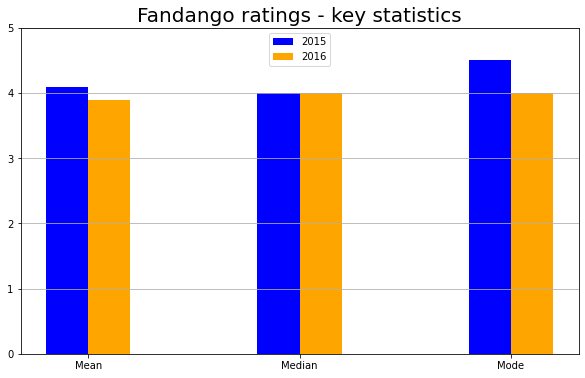

In [19]:
# Create a plot that shows these key statistics
fig, axes = plt.subplots(figsize=(10,6))

x = np.arange(3)
thelabels = ['Mean', 'Median', 'Mode']
the2015data = [fandango_2015_mean, fandango_2015_median, fandango_2015_mode]
the2016data = [fandango_2016_mean, fandango_2016_median, fandango_2016_mode]

plt.bar(x-0.1, width = 0.2, height= the2015data, label = '2015', color = 'blue')
plt.bar(x+0.1, width = 0.2, height= the2016data, label = '2016', color = 'orange')

plt.legend(loc = 'upper center')
plt.ylim(0,5)
plt.xticks(x, thelabels)
plt.grid(axis = 'y')

plt.title('Fandango ratings - key statistics', fontsize = 20)
plt.show()

This seems to be an indication that the ratings did go down indeed. The mean changed from 4.09 to 3.89. Also the mode (the most given rating) changed from 4.5 stars to 4.0 stars).

To see more detail, let's next create a density plot for the ratings of both sets.

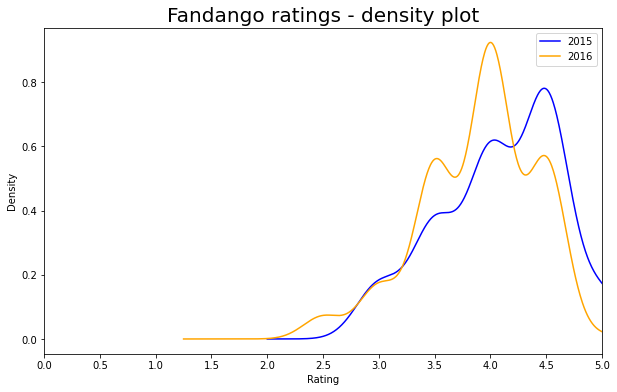

In [20]:
# Create a density plot for the ratings of both 2015 and 2016
fig, ax = plt.subplots(figsize=(10,6))  
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', color = 'blue')
fandango_2016['fandango'].plot.kde(label = '2016', color = 'orange')
plt.legend()
plt.xlim(0,5)
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.xlabel('Rating')
plt.title('Fandango ratings - density plot', fontsize = 20)
plt.show()

Observations:
* Both are left skewed: there are mostly ratings with a lot of stars, and ratings below 3 stars are rightout rare.
* Also from this graph, it *seems* that 2016 ratings are lower indeed than the 2015 ratings. 

While the density chart gave insight (and was fast to create based on our data), things may show even clearer when we show bar charts that shows how frequent each rating was given. Note that we will use 'percentages' rather than 'frequencies', as the number of records is not the same in both datasets.

In [21]:
# Create frequency distribution tables (percentages)
freq_table_2015 = 100*fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()
freq_table_2016 = 100*fandango_2016['fandango'].value_counts(normalize = True).sort_index()

In [22]:
# Check result 2015
freq_table_2015

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [23]:
# Check result 2016
freq_table_2016

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [24]:
# Combine this into one dataframe
freq_table_combined = pd.concat([freq_table_2015, freq_table_2016], axis = 1).fillna(0)
freq_table_combined.rename(columns={"Fandango_Stars": "2015", "fandango": "2016"}, inplace = True)

In [25]:
# Check the result
freq_table_combined

,2015,2016
2.5,0.000000,3.141361
3.0,8.527132,7.329843
3.5,17.829457,24.083770
4.0,28.682171,40.314136
4.5,37.984496,24.607330
5.0,6.976744,0.523560


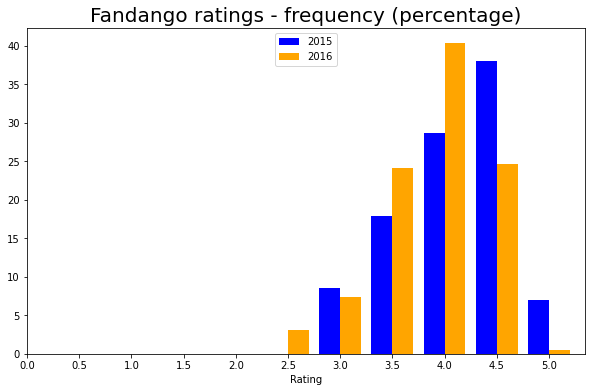

In [26]:
# Create a plot that shows the percentages per rating
fig, axes = plt.subplots(figsize=(10,6))

plt.bar(x=freq_table_combined.index-0.1, width = 0.2, height=freq_table_combined['2015'], label = '2015', color = 'blue')
plt.bar(x=freq_table_combined.index+0.1, width = 0.2, height=freq_table_combined['2016'], label = '2016', color = 'orange')

plt.legend(loc = 'upper center')
plt.xticks(np.arange(0, 5.5, step=0.5))

plt.xlabel('Rating')
plt.title('Fandango ratings - frequency (percentage)', fontsize = 20)

plt.show()

Also here we can see that ratings appeared lower in 2016 than in 2015. The percentage of ratings higher than 4.0 stars went down from 45% to 25%, and 5.0 star ratings became very rare!

**How did Fandango ratings compare to other ratings in 2016?**

What Hickey observed is that Fandango ratings were significantly higher than ratings by others for the same movies (see the picture in the introduction). The 2016 dataset also includes several such ratings. And while we must be careful to draw any conclusions, it's still interesting to see what such picture looks like for the 'after the article' situation.

Let's create a density plot where we can compare the Fandango ratings with several other ratings that also appeared in Hickey's graph. (The scores that are displayed are the scores that were normalized to a 0-5 scale.)

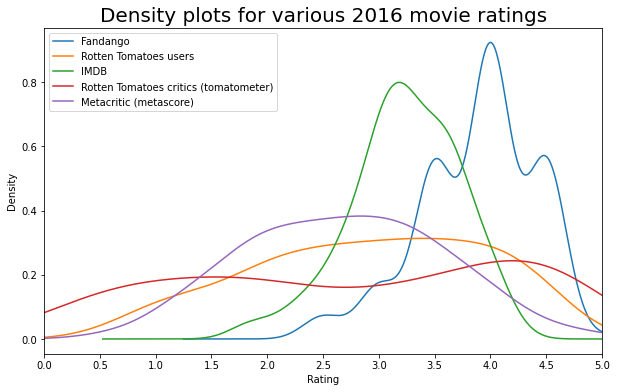

In [27]:
# Create a density plot for the ratings of 2016 for several ratings
fig, ax = plt.subplots(figsize=(10,6))  

fandango_2016['fandango'].plot.kde(label = 'Fandango')
fandango_2016['n_audience'].plot.kde(label = 'Rotten Tomatoes users')
fandango_2016['n_imdb'].plot.kde(label = 'IMDB')
fandango_2016['n_tmeter'].plot.kde(label = 'Rotten Tomatoes critics (tomatometer)')
fandango_2016['n_metascore'].plot.kde(label = 'Metacritic (metascore)')

plt.legend()
plt.xlim(0,5)
plt.xticks(np.arange(0, 5.5, step=0.5))

plt.xlabel('Rating')
plt.title('Density plots for various 2016 movie ratings', fontsize = 20)

plt.show()

As mentioned, we must be careful to draw conclusions too quickly, however it seems that the Fandango ratings are still higher than other ratings.

## Conclusion

It looks like Fandango indeed made a change after Hickey's article: the Fandango ratings significantly went down in 2016. 

The Fandango ratings seem to be higher still than other ratings